In [1]:
# prompt: konek ke google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


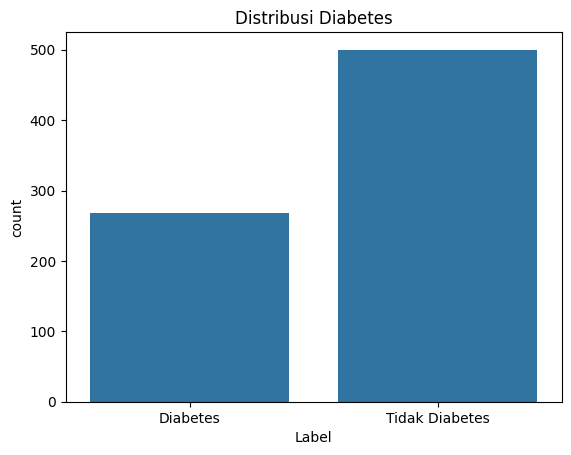

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Statistika & Mining 6/diabetes.csv')
df.head(5)

# df.info()
# df.describe()

# df.isnull().sum()

df['Label'] = df['Outcome'].map({0: 'Tidak Diabetes', 1: 'Diabetes'})
df[['Outcome', 'Label']].head()

sns.countplot(x='Label', data=df)
plt.title('Distribusi Diabetes')
plt.show()

from google.colab import files

df.to_csv('diabetes_labeled.csv', index=False)
files.download('diabetes_labeled.csv')


In [25]:
import pandas as pd

# Data ulasan pelanggan
data_ulasan = {
    'No': list(range(1, 11)),
    'Ulasan': [
        "Produk ini sangat bagus! Saya sangat puas dengan kualitasnya.",
        "Pengiriman sangat lambat, saya kecewa dengan layanan ini.",
        "Barang sesuai dengan deskripsi, cukup oke.",
        "Kualitas jelek dan tidak sesuai gambar!",
        "Lumayan, tapi saya berharap lebih baik lagi.",
        "Sangat direkomendasikan! Barang bagus dan harga terjangkau.",
        "Mengecewakan, produk yang saya terima berbeda dari yang dijanjikan.",
        "Biasa saja, tidak terlalu bagus tapi juga tidak jelek.",
        "Terlalu mahal untuk kualitas yang didapat, tidak worth it!",
        "Fast response, packing rapi, dan produk berkualitas tinggi!"
    ],
    'Label': [
        "Positif",
        "Negatif",
        "Netral",
        "Negatif",
        "Netral",
        "Positif",
        "Negatif",
        "Netral",
        "Negatif",
        "Positif"
    ]
}

df_ulasan = pd.DataFrame(data_ulasan)
df_ulasan.to_csv('ulasan_labeled.csv', index=False)

# Download file
from google.colab import files
files.download('ulasan_labeled.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
# Data email
data_email = {
    'No': list(range(1, 11)),
    'Email': [
        "Selamat! Anda memenangkan hadiah besar! Klik link ini untuk klaim hadiah Anda.",
        "Rapat tim akan diadakan besok pukul 10 pagi di ruang konferensi.",
        "Dapatkan diskon besar hingga 70%! Penawaran terbatas!",
        "Mohon konfirmasi kehadiran Anda dalam acara minggu depan.",
        "Anda terpilih untuk mendapatkan pinjaman tanpa bunga! Hubungi kami segera!",
        "Akun Anda terdeteksi mengalami aktivitas mencurigakan. Segera periksa keamanan!",
        "Kartu kredit Anda mendapatkan penawaran khusus hari ini! Jangan lewatkan kesempatan ini.",
        "Saya butuh laporan keuangan untuk rapat sore ini, bisa dikirim sekarang?",
        "Tawaran eksklusif: Beli 1 gratis 1 hanya hari ini!",
        "Berikut adalah notulen rapat kemarin. Mohon ditinjau dan berikan masukan."
    ]
}

df_email = pd.DataFrame(data_email)

# Aturan pelabelan berdasarkan kata kunci
keywords = ['hadiah', 'diskon', 'pinjaman']

def label_spam(email):
    for keyword in keywords:
        if keyword in email.lower():
            return 'Spam'
    return 'Non-Spam'

df_email['Label'] = df_email['Email'].apply(label_spam)
df_email.to_csv('email_labeled.csv', index=False)

# Menampilkan hasil
df_email
# Download file
from google.colab import files
files.download('email_labeled.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [38]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display, HTML

# Ganti dengan path dataset kamu di Colab
dataset_path = '/content/drive/MyDrive/Statistika & Mining 6/train'  # Folder gambar
data = []

# Daftar kelas (ganti sesuai data)
classes = ['anjing', 'kucing']

# Loop melalui semua gambar dalam folder
for img_file in os.listdir(dataset_path):
    if img_file.endswith('.jpg') or img_file.endswith('.png'):
        # Tentukan label berdasarkan nama file atau folder
        if 'anjing' in img_file.lower():  # Misalnya, jika nama file mengandung 'anjing'
            label = 'anjing'
        elif 'kucing' in img_file.lower():  # Jika nama file mengandung 'kucing'
            label = 'kucing'
        else:
            continue  # Lewati file yang tidak cocok

        # Tambahkan data ke list
        data.append({
            'Nama Gambar': img_file,
            'Label': label,
            'Set': 'train'
        })

# Buat DataFrame
df = pd.DataFrame(data)

# Menampilkan DataFrame (informasi gambar dan label)
display(HTML(df.to_html()))  # Menampilkan tabel di notebook

# Menampilkan gambar-gambar dengan label
for index, row in df.iterrows():
    img_path = os.path.join(dataset_path, row['Nama Gambar'])

    # Periksa apakah file gambar ada
    if os.path.exists(img_path):
        img = mpimg.imread(img_path)  # Membaca gambar
        plt.figure(figsize=(5,5))
        plt.imshow(img)  # Menampilkan gambar
        plt.title(f"Label: {row['Label']}")  # Menampilkan label
        plt.axis('off')  # Menghilangkan axis
        plt.show()
    else:
        print(f"File {row['Nama Gambar']} tidak ditemukan.")


Output hidden; open in https://colab.research.google.com to view.